In [4]:
import pandas as pd
import os

In [5]:
data_dir = "data/kaggle_dl"

We have three building

In [6]:
os.listdir(os.path.join(data_dir, 'RBHU-2025-01','RBHU'))

['B106', 'B205', 'B201']

# Metadata Exploration

In total we have almost 6K sensors in all buildings

In [7]:
metadata = pd.read_parquet(os.path.join(data_dir, "metadata.parquet"))
print(metadata.shape)

(5835, 33)


In [8]:
metadata.head()

,object_id,class_id,description,interpolation_mode,pcl_type,conversion_index,dimension_index,dimension_text,lifetime,resolution,...,bde_duration,bde_resolution,bde_group,bim_building_name,bim_building_part,bim_room_category,bim_room_area,bim_energy_category,bim_room_description,bim_floor
220,B106WS01.AM50,19.0,light direction,3.0,REAL,62.0,20.0,°,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,Other,None,None,None,NaN,None,None,None
5808,B106WS01.AM51,19.0,light intensity,3.0,REAL,19.0,21.0,k LUX,1826.0,120.0,...,1825- 00:00:00.000,00:15:00.000,Other,None,None,None,NaN,None,None,None
5797,B106WS01.AM52,19.0,air pressure,3.0,REAL,63.0,22.0,hPa,1826.0,120.0,...,1825- 00:00:00.000,01:00:00.000,Other,None,None,None,NaN,None,None,None
1280,B106WS01.AM53,19.0,relative humidity (REL. AIR HUMIDITY),3.0,REAL,10.0,9.0,%rH,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,Other,None,None,None,NaN,None,None,None
1372,B106WS01.AM54,19.0,external temperature (AUSSENTEMP.BP106),3.0,REAL,64.0,2.0,°C,1826.0,120.0,...,1825- 00:00:00.000,00:15:00.000,Other,None,None,None,NaN,None,None,None


In [9]:
metadata.columns

Index(['object_id', 'class_id', 'description', 'interpolation_mode',
       'pcl_type', 'conversion_index', 'dimension_index', 'dimension_text',
       'lifetime', 'resolution', 'data_group_id', 'file', 'time', 'building',
       'device_class', 'device', 'channel', 'zone', 'room', 'floor',
       'bde_recorder', 'bde_object_id', 'bde_channel_typ', 'bde_duration',
       'bde_resolution', 'bde_group', 'bim_building_name', 'bim_building_part',
       'bim_room_category', 'bim_room_area', 'bim_energy_category',
       'bim_room_description', 'bim_floor'],
      dtype='object')

Information about location within floor of a building is rarely available

<Axes: >

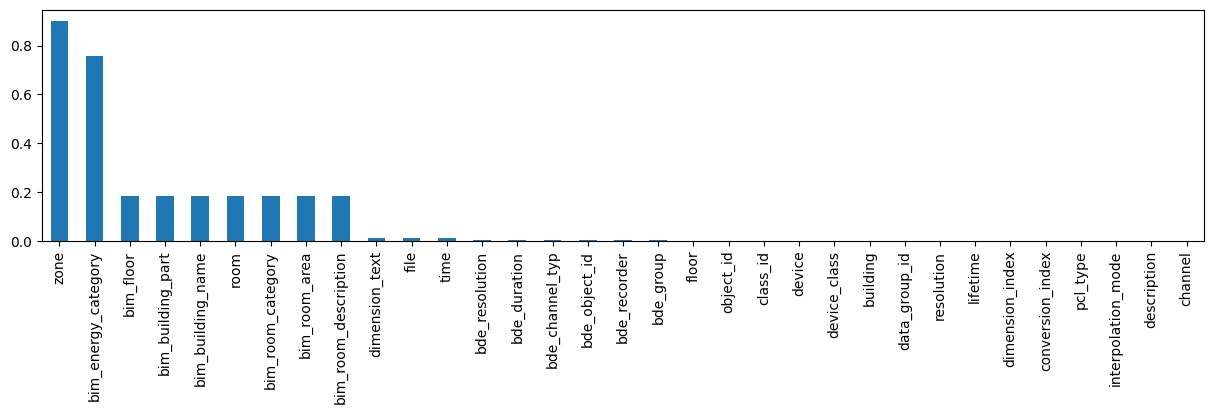

In [10]:
metadata.isnull().mean().sort_values(ascending=False).plot.bar(figsize=(15,3))

bde_group is a grouping of sensors

<Axes: xlabel='bde_group'>

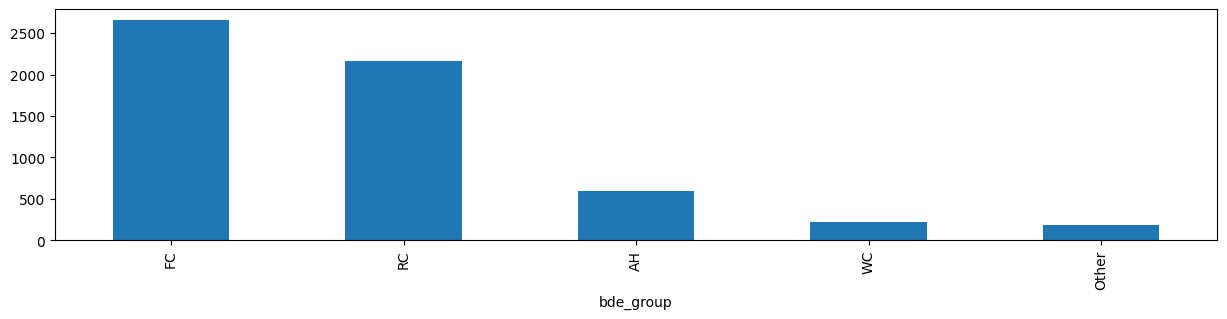

In [11]:
metadata['bde_group'].value_counts().plot.bar(figsize=(15,3))

In [12]:
metadata[metadata['bde_group']!='Other']['building'].value_counts()

building
B201    5431
B205     219
Name: count, dtype: int64

In [13]:
metadata[metadata['bde_group']=='Other']['building'].value_counts()

building
B205    164
B106     11
B201     10
Name: count, dtype: int64

In [14]:
class_counts = metadata['class_id'].value_counts()
print(class_counts)

class_id
19.0      3754
22.0       712
744.0      554
143.0      488
140.0      309
1324.0       9
109.0        9
Name: count, dtype: int64


In [15]:
sensors_per_class = {}
for class_id, _ in class_counts.items():
    class_metadata = metadata[metadata['class_id'] == class_id]
    sensors_per_class[class_id] = class_metadata

Sensors of any type

In [16]:
sensors_per_class[19.0].head(5)

,object_id,class_id,description,interpolation_mode,pcl_type,conversion_index,dimension_index,dimension_text,lifetime,resolution,...,bde_duration,bde_resolution,bde_group,bim_building_name,bim_building_part,bim_room_category,bim_room_area,bim_energy_category,bim_room_description,bim_floor
220,B106WS01.AM50,19.0,light direction,3.0,REAL,62.0,20.0,°,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,Other,None,None,None,NaN,None,None,None
5808,B106WS01.AM51,19.0,light intensity,3.0,REAL,19.0,21.0,k LUX,1826.0,120.0,...,1825- 00:00:00.000,00:15:00.000,Other,None,None,None,NaN,None,None,None
5797,B106WS01.AM52,19.0,air pressure,3.0,REAL,63.0,22.0,hPa,1826.0,120.0,...,1825- 00:00:00.000,01:00:00.000,Other,None,None,None,NaN,None,None,None
1280,B106WS01.AM53,19.0,relative humidity (REL. AIR HUMIDITY),3.0,REAL,10.0,9.0,%rH,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,Other,None,None,None,NaN,None,None,None
1372,B106WS01.AM54,19.0,external temperature (AUSSENTEMP.BP106),3.0,REAL,64.0,2.0,°C,1826.0,120.0,...,1825- 00:00:00.000,00:15:00.000,Other,None,None,None,NaN,None,None,None


Valves, fans, bypass

In [17]:
sensors_per_class[22.0].head(5)

,object_id,class_id,description,interpolation_mode,pcl_type,conversion_index,dimension_index,dimension_text,lifetime,resolution,...,bde_duration,bde_resolution,bde_group,bim_building_name,bim_building_part,bim_room_category,bim_room_area,bim_energy_category,bim_room_description,bim_floor
2005,B201AH108.AC11,22.0,HEATER VALVE,3.0,REAL,124.0,1.0,%,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,AH,None,None,None,NaN,None,None,None
1295,B201AH108.AC12,22.0,HEATER VALVE BYPASS,3.0,REAL,124.0,1.0,%,181.0,120.0,...,None,None,None,None,None,None,NaN,None,None,None
62,B201AH108.AC21,22.0,COOLER VALVE,3.0,REAL,124.0,1.0,%,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,AH,None,None,None,NaN,None,None,None
5868,B201AH108.AC22,22.0,COOLER VALVE BYPASS,3.0,REAL,124.0,1.0,%,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,AH,None,None,None,NaN,None,None,None
3903,B201AH108.AC63,22.0,SPEED SUPPLY-AIR FAN,3.0,REAL,124.0,1.0,%,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,AH,None,None,None,NaN,None,None,None


In [18]:
sensors_per_class[744.0].head(5)

,object_id,class_id,description,interpolation_mode,pcl_type,conversion_index,dimension_index,dimension_text,lifetime,resolution,...,bde_duration,bde_resolution,bde_group,bim_building_name,bim_building_part,bim_room_category,bim_room_area,bim_energy_category,bim_room_description,bim_floor
3595,B201AH108.VP31,744.0,SETPOINT VALUE SUPPLY-AIR PRESSURE,3.0,REAL,79.0,5.0,Pa,731.0,360.0,...,730- 00:00:00.000,00:06:00.000,AH,None,None,None,NaN,None,None,None
1334,B201AH108.VT01,744.0,SETPOINT RETURN-TEMPERATURE,3.0,REAL,118.0,2.0,°C,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,AH,None,None,None,NaN,None,None,None
1350,B201AH108.VT07,744.0,SETPOINT OUTLET TEMP. HEATER,3.0,REAL,10.0,2.0,°C,731.0,300.0,...,730- 00:00:00.000,00:05:00.000,AH,None,None,None,NaN,None,None,None
1810,B201AH108.VT13,744.0,SETPOINT OUTLET TEMP. COOLER,3.0,REAL,10.0,2.0,°C,731.0,300.0,...,730- 00:00:00.000,00:05:00.000,AH,None,None,None,NaN,None,None,None
3789,B201AH108.VT21_0,744.0,PRESET ROOM TEMPERATURE SELECTION,3.0,REAL,308.0,-1.0,None,731.0,300.0,...,730- 00:00:00.000,00:05:00.000,AH,None,None,None,NaN,None,None,None


Units

In [19]:
sensors_per_class[143.0].head(5)

,object_id,class_id,description,interpolation_mode,pcl_type,conversion_index,dimension_index,dimension_text,lifetime,resolution,...,bde_duration,bde_resolution,bde_group,bim_building_name,bim_building_part,bim_room_category,bim_room_area,bim_energy_category,bim_room_description,bim_floor
3721,B201FC001_1.DC21,143.0,UNIT ON/OFF 201.A.057,2.0,INTEGER,217.0,0.0,ml/h,731.0,300.0,...,730- 00:00:00.000,00:05:00.000,FC,BP201,BP2010,VF,59.46,None,Kitchen,00 floor
2082,B201FC001_2.DC21,143.0,UNIT ON/OFF 201.A.057,2.0,INTEGER,217.0,0.0,ml/h,731.0,300.0,...,730- 00:00:00.000,00:05:00.000,FC,BP201,BP2010,VF,59.46,None,Kitchen,00 floor
5296,B201FC001_3.DC21,143.0,UNIT ON/OFF 201.A.057,2.0,INTEGER,217.0,0.0,ml/h,731.0,300.0,...,730- 00:00:00.000,00:05:00.000,FC,BP201,BP2010,VF,59.46,None,Kitchen,00 floor
5515,B201FC002_1.DC21,143.0,UNIT ON/OFF 201.A.050,2.0,INTEGER,217.0,0.0,ml/h,731.0,300.0,...,730- 00:00:00.000,00:05:00.000,FC,BP201,BP2010,NF1,57.11,None,Kitchen,00 floor
170,B201FC003_1.DC21,143.0,UNIT ON/OFF 201.A.040,2.0,INTEGER,217.0,0.0,ml/h,731.0,300.0,...,730- 00:00:00.000,00:05:00.000,FC,BP201,BP2010,VF,23.32,None,Kitchen,00 floor


In [20]:
sensors_per_class[140.0].head(5)

,object_id,class_id,description,interpolation_mode,pcl_type,conversion_index,dimension_index,dimension_text,lifetime,resolution,...,bde_duration,bde_resolution,bde_group,bim_building_name,bim_building_part,bim_room_category,bim_room_area,bim_energy_category,bim_room_description,bim_floor
4915,B106WS01.DM03,140.0,control voltage 24V-AC (ST-SPG.),2.0,INTEGER,219.0,0.0,ml/h,731.0,120.0,...,730- 00:00:00.000,00:06:00.000,Other,None,None,None,NaN,None,None,None
2187,B201AH131.DM52,140.0,FROST PROTECTION,2.0,INTEGER,-1.0,0.0,ml/h,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,AH,None,None,None,NaN,None,None,None
3026,B201FC370_2.DM21,140.0,STATUS UNIT ON/OFF 201.C.368,2.0,INTEGER,217.0,0.0,ml/h,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,FC,BP201,BP2013,NF2,1011.97,None,Nassräume / Toilet areas,03 floor
6,B201FC370_3.DM21,140.0,STATUS UNIT ON/OFF 201.C.368,2.0,INTEGER,217.0,0.0,ml/h,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,FC,BP201,BP2013,NF2,1011.97,None,Nassräume / Toilet areas,03 floor
4329,B201FC370_4.DM21,140.0,STATUS UNIT ON/OFF 201.C.368,2.0,INTEGER,217.0,0.0,ml/h,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,FC,BP201,BP2013,NF2,1011.97,None,Nassräume / Toilet areas,03 floor


In [21]:
target = "B205WC000.AM02"
variables = [
    "B205WC000.AM01",  # a supply temperature chilled water
    "B106WS01.AM54",  # an external temperature
]

selected_sensors = metadata[metadata['object_id'].isin(variables + [target])]
selected_sensors.T

,1372,4143,3963
object_id,B106WS01.AM54,B205WC000.AM01,B205WC000.AM02
class_id,19.0,19.0,19.0
description,external temperature (AUSSENTEMP.BP106),SUPPLY TEMPERATURE CHILLED WATER,RETURN TEMPERATURE CHILLED WATER
interpolation_mode,3.0,3.0,3.0
pcl_type,REAL,REAL,REAL
conversion_index,64.0,118.0,118.0
dimension_index,2.0,2.0,2.0
dimension_text,°C,°C,°C
lifetime,1826.0,731.0,731.0
resolution,120.0,120.0,120.0


Just a few sensors are from target building B205

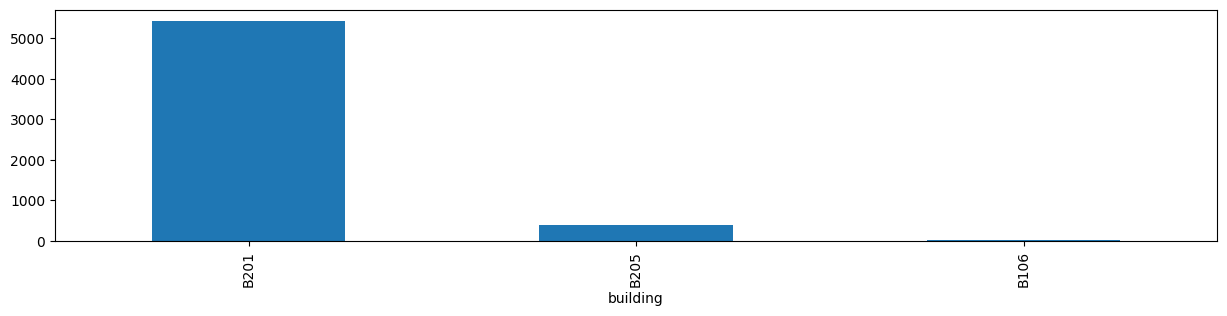

In [22]:
metadata['building'].value_counts().plot.bar(figsize=(15,3))
metadata['external'] = metadata['description'].str.contains('external', case=False, na=False)

There is only one external sensor - B106WS01.AM54

In [23]:
metadata['external'].value_counts()

external
False    5834
True        1
Name: count, dtype: int64

# Time Series Exploration

In [24]:
ts = pd.read_parquet('data/kaggle_dl/RBHU-2025-01/RBHU/B205/B205WC000.AM02.parquet')
ts.shape


(12882, 2)

In [25]:
ts.head()

,time,data
132831,2025-01-01 00:04:44+00:00,10.097141
132832,2025-01-01 00:06:12+00:00,10.045224
132833,2025-01-01 00:09:09+00:00,9.989771
132834,2025-01-01 00:18:35+00:00,9.939380
132835,2025-01-01 00:23:36+00:00,9.993369


In [26]:
ts.dtypes

time    datetime64[ns, UTC]
data                float64
dtype: object

In [27]:
resampled = ts.set_index('time').resample('1min').mean().interpolate().reset_index()

In [28]:
resampled

,time,data
0,2025-01-01 00:04:00+00:00,10.097141
1,2025-01-01 00:05:00+00:00,10.071183
2,2025-01-01 00:06:00+00:00,10.045224
3,2025-01-01 00:07:00+00:00,10.026740
4,2025-01-01 00:08:00+00:00,10.008255
...,...,...
44631,2025-01-31 23:55:00+00:00,11.096623
44632,2025-01-31 23:56:00+00:00,11.041081
44633,2025-01-31 23:57:00+00:00,11.023229
44634,2025-01-31 23:58:00+00:00,11.005377


<Axes: xlabel='time'>

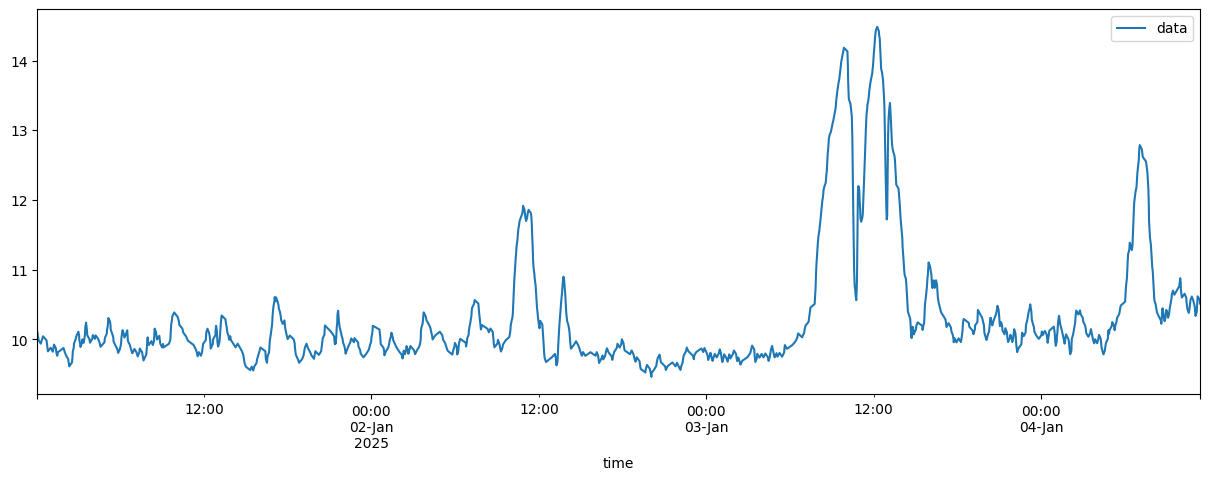

In [29]:
resampled.head(5000).plot(x='time', y='data', figsize=(15,5))

# Correlation analysis

In [44]:
corr_df = pd.read_csv('b205_sensor_correlations.csv')
corr_df.shape

(97, 3)

In [45]:
corr_df.head()

,sensor_id,correlation,abs_correlation
0,B205WC140.AC21,0.823917,0.823917
1,B205WC000.AM71,0.689123,0.689123
2,B205WC001.AM71,0.681418,0.681418
3,B205HP110.AM55_3,0.595886,0.595886
4,B205HW010.PA11,0.586318,0.586318


In [46]:
shifted_corr_df = pd.read_csv('b205_sensor_correlations_shift-180min.csv')
shifted_corr_df.shape

(97, 3)

In [47]:
shifted_corr_df.head()

,sensor_id,correlation,abs_correlation
0,B205WC140.AC21,0.607506,0.607506
1,B205HW010.PA11,0.579535,0.579535
2,B205HW020.PA11,0.532842,0.532842
3,B205WC001.AM71,0.501144,0.501144
4,B205WC000.AM71,0.493444,0.493444


The 180 minutes shift does not change the landscape much. The same set of sensors are correlated with the target sensor in both cases.

In [48]:
merged_df = corr_df.merge(shifted_corr_df, on='sensor_id', suffixes=('_no_shift', '_shifted_180min'))
merged_df[['correlation_no_shift', 'correlation_shifted_180min']].corr(method='spearman')

,correlation_no_shift,correlation_shifted_180min
correlation_no_shift,1.000000,0.927581
correlation_shifted_180min,0.927581,1.000000


In [53]:
corr_with_meta_df = shifted_corr_df.merge(metadata[['object_id', 'description','dimension_text', 'floor']], left_on='sensor_id', right_on='object_id', how='left').drop(columns=['object_id'])

In [54]:
corr_with_meta_df.head(30)

,sensor_id,correlation,abs_correlation,description,dimension_text,floor
0,B205WC140.AC21,0.607506,0.607506,PRIMARY VALVE 1,%,
1,B205HW010.PA11,0.579535,0.579535,NUMBER OF STARTS,dec,
2,B205HW020.PA11,0.532842,0.532842,NUMBER OF STARTS,dec,
3,B205WC001.AM71,0.501144,0.501144,TOTAL VOLUME CHILLED WATER,m3/h,
4,B205WC000.AM71,0.493444,0.493444,VOLUME CHILLED WATER BP201/202/206,m3/h,
5,B205HP110.AM55_3,0.399644,0.399644,ACTUAL CAPACITY,%,
6,B205WC030.AC63,-0.378186,0.378186,SETPOINT CHILLED WATER PUMP,%,
7,B205WC030.AM51_4,-0.370030,0.370030,RUN ENABLED,Int,
8,B205WC030.AM53_1,-0.369949,0.369949,EVAPORATOR FLOW SWITCH STATUS,Int,
9,B205WC002.RA001,0.359835,0.359835,SPEED CHILLED WATER PUMP,%,


In [60]:
threshold = 0.2
high_abs_corr_df = corr_with_meta_df[ corr_with_meta_df['abs_correlation'] > threshold ]
for _, row in high_abs_corr_df.iterrows():
    print(f"'{row['sensor_id']}',# {row['description']}")

'B205WC140.AC21',# PRIMARY VALVE 1
'B205HW010.PA11',# NUMBER OF STARTS
'B205HW020.PA11',# NUMBER OF STARTS
'B205WC001.AM71',# TOTAL VOLUME CHILLED WATER
'B205WC000.AM71',# VOLUME CHILLED WATER BP201/202/206
'B205HP110.AM55_3',# ACTUAL CAPACITY
'B205WC030.AC63',# SETPOINT CHILLED WATER PUMP
'B205WC030.AM51_4',# RUN ENABLED
'B205WC030.AM53_1',# EVAPORATOR FLOW SWITCH STATUS
'B205WC002.RA001',# SPEED CHILLED WATER PUMP
'B205HW000.PA72',# VOLUME FEEDING HOT WATER SYSTEM
'B205HW020.AC62',# SPEED SECONDARY PUMP
'B205WC010.AM51_4',# RUN ENABLED
'B205WC010.AM51_3',# CHILLER STATE
'B205WC100.DM091_1',# HEAT PUMP HP110 READY - HEATING
'B205WC000.DM90',# MAX. TEMP. CHILLED WATER
'B205HW020.AM72',# CURRENT POWER
'B205HW020.VT01_1',# REQ. TEMPERATURE SETPOINT - BOSCH TT
'B205HW001.AM71',# VOLUME HOT WATER BP201/202/206
'B205HW002.AM71',# VOLUME HOT WATER BP201/202/206
'B205HW002.AM71_1',# REAL HEAT CAPACITY
'B205WC030.AM55_3',# ACTUAL CAPACITY
'B205HP110.AC61',# SPEED COOLING WATER PUMP
'B205WC030.

# Extra ideas

- add device arument through argparse
- enable custom ML models (e.g. LightGBM, XGBoost)
- expand correlation analysis to 2024 summer months (same period as test set)
- also inspect features from other buildings in terms of correlation with target sensor
- implement early stopping in model training based on validation set performance
- track results for offline experiments with wandb
- add training data from 2024